In [1]:
!pip install pandas


In [3]:
import pandas as pd

In [5]:
# Read a CSV file into a DataFrame
df = pd.read_csv('Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
print (pd.read_csv('Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv'))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [22]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Check for missing values and count them for each column
missing_values = df.isna().sum()

In [11]:
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df.duplicated()

In [13]:
# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

In [14]:
print (duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


In [15]:
# Generate summary statistics to check for any outliers
summary_stats = df.describe()
print(summary_stats)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [19]:
#Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [20]:
print(categorical_columns)


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [44]:
# List of categorical columns to one-hot encode
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

In [46]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# Print the one-hot encoded variables
print(df_encoded)

      customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges  \
0     7590-VHVEG              0       1           29.85        29.85   
1     5575-GNVDE              0      34           56.95       1889.5   
2     3668-QPYBK              0       2           53.85       108.15   
3     7795-CFOCW              0      45           42.30      1840.75   
4     9237-HQITU              0       2           70.70       151.65   
...          ...            ...     ...             ...          ...   
7038  6840-RESVB              0      24           84.80       1990.5   
7039  2234-XADUH              0      72          103.20       7362.9   
7040  4801-JZAZL              0      11           29.60       346.45   
7041  8361-LTMKD              1       4           74.40        306.6   
7042  3186-AJIEK              0      66          105.65       6844.5   

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0                 1            0           0          

In [26]:
#Perform descriptive statistics to summarize the dataset
descriptive_stats = df.describe()

In [27]:
print(descriptive_stats)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
key_variables = ['gender', 'MonthlyCharges', 'TotalCharges', 'Churn',]

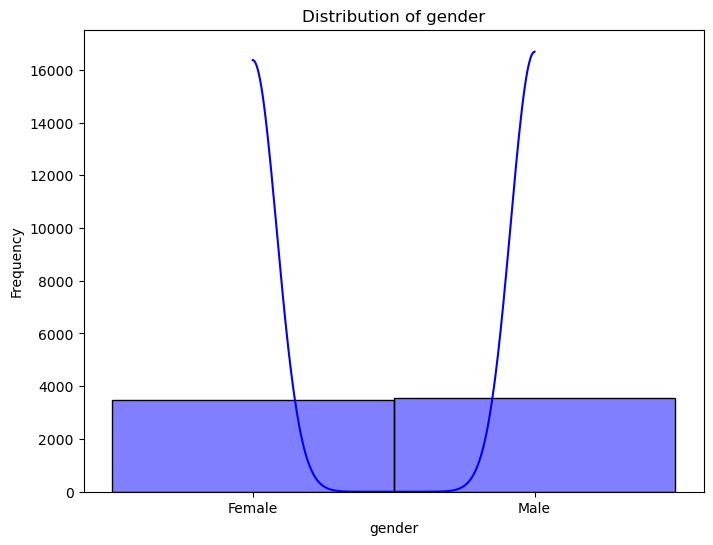

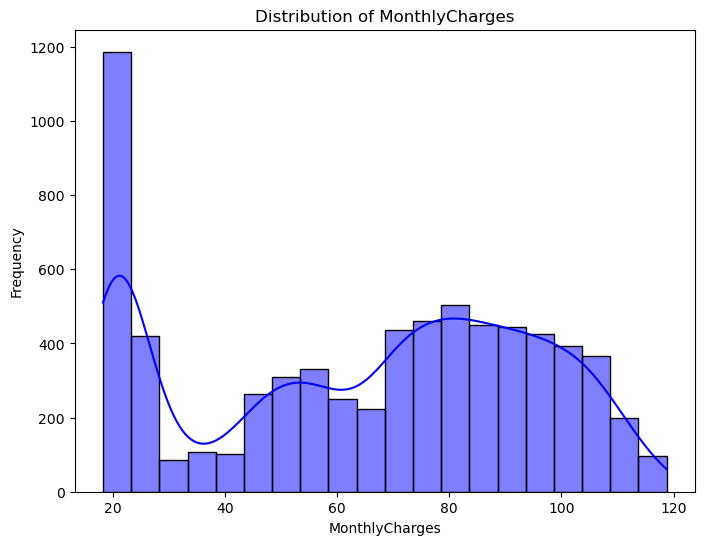

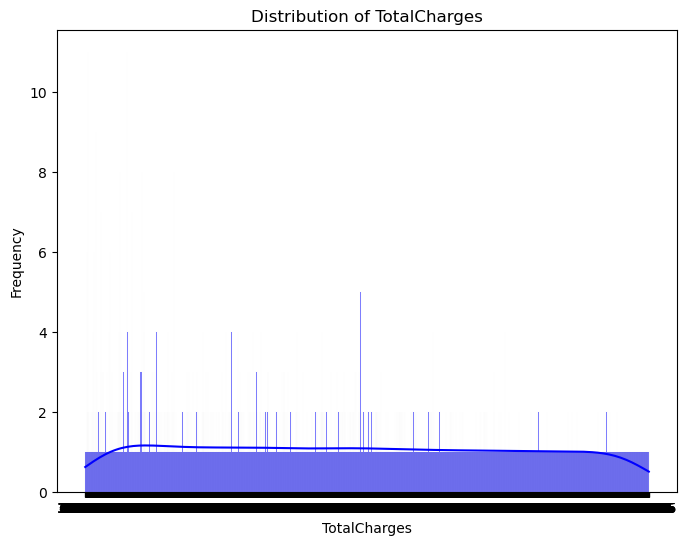

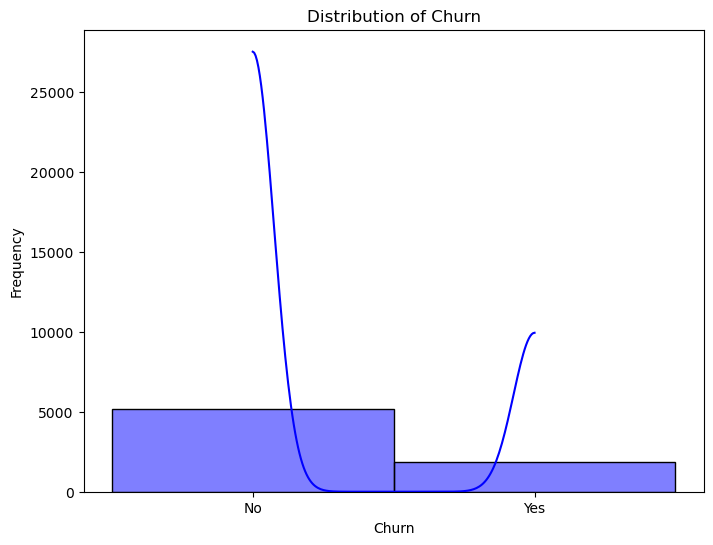

In [38]:
# Loop through each variable in the list
for variable in key_variables:
    # Create a new figure for each variable
    plt.figure(figsize=(8, 6))

    # Create a histogram using Seaborn
    sns.histplot(df[variable], kde=True, bins=20, color='blue')

    # Set plot labels and title 
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable}')

    # Show the plot
    plt.show()

In [50]:
# Calculate the correlation between 'gender_male' and 'OnlineSecurity_yes'
correlation_coefficient = df_encoded['gender_Male'].corr(df_encoded['OnlineSecurity_Yes'])

print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: -0.0170207968139595


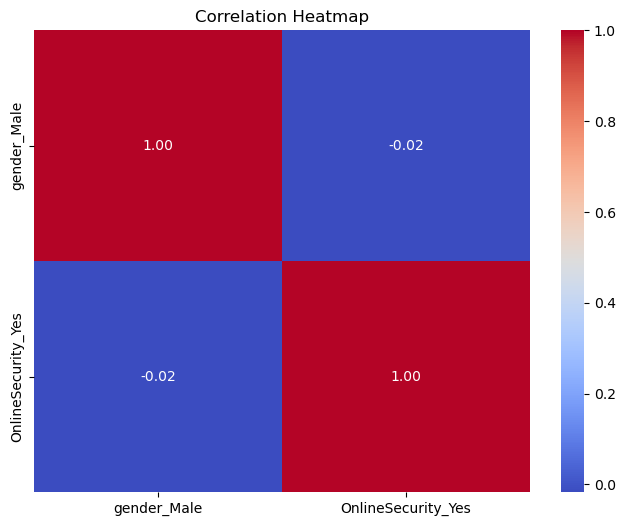

In [55]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Male', 'OnlineSecurity_Yes', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [59]:
# Calculate the correlation between 'gender_male' and 'OnlineSecurity_yes'
correlation_coefficient = df_encoded['gender_Male'].corr(df_encoded['OnlineSecurity_No'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.010429088419202034


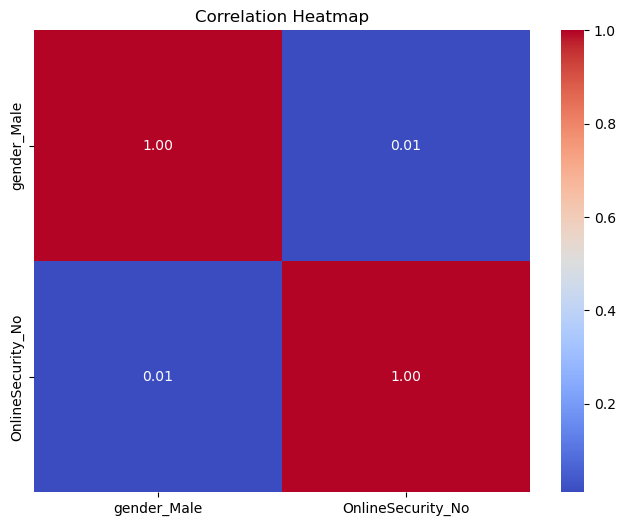

In [60]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Male', 'OnlineSecurity_No', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [56]:
# Calculate the correlation between 'gender_female' and 'OnlineSecurity_yes'
correlation_coefficient = df_encoded['gender_Female'].corr(df_encoded['OnlineSecurity_Yes'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.0170207968139595


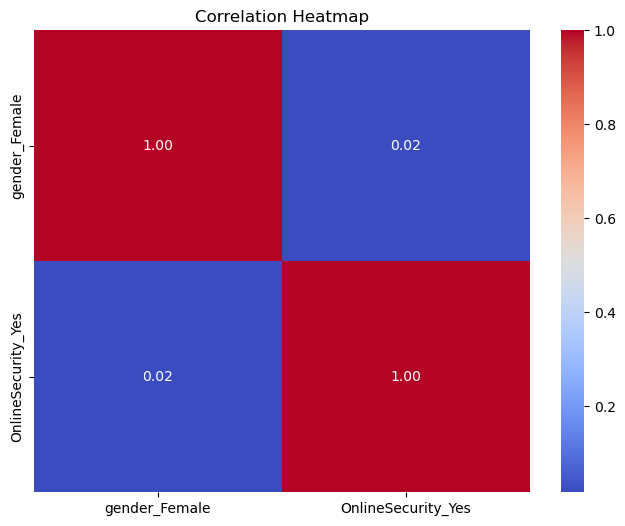

In [54]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Female', 'OnlineSecurity_Yes', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [57]:
# Calculate the correlation between 'gender_female' and 'OnlineSecurity_no'
correlation_coefficient = df_encoded['gender_Female'].corr(df_encoded['OnlineSecurity_No'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.010429088419202034


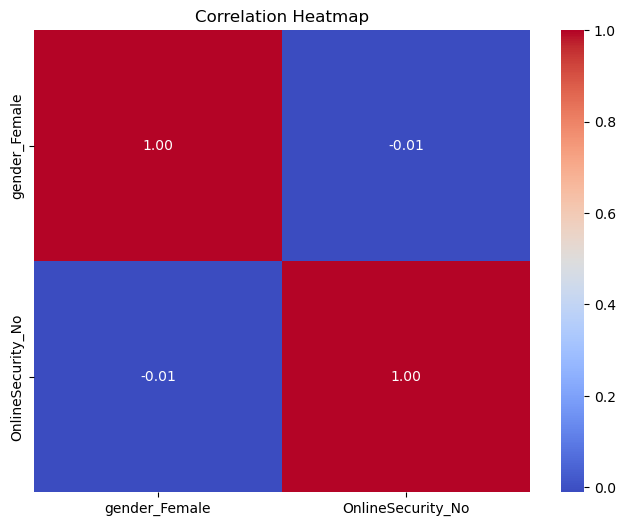

In [58]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Female', 'OnlineSecurity_No', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [132]:
# Calculate the correlation between 'gender_female' and 'Churn_No'
correlation_coefficient = df_encoded['gender_Female'].corr(df_encoded['Churn_No'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.008612095078997892


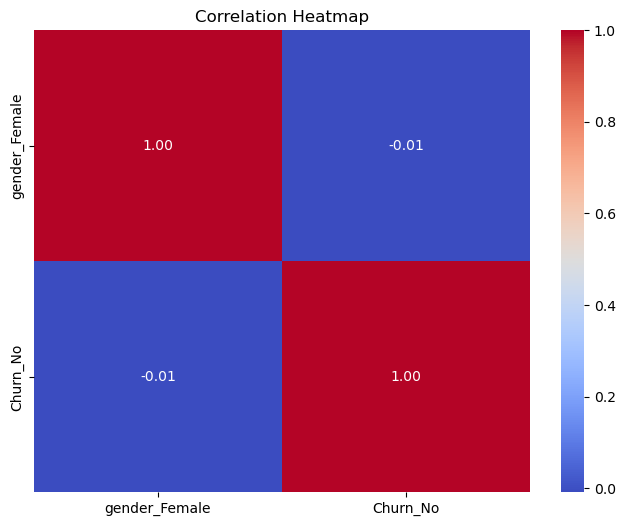

In [133]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Female', 'Churn_No', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [134]:
# Calculate the correlation between 'gender_female' and 'Churn_yes'
correlation_coefficient = df_encoded['gender_Female'].corr(df_encoded['Churn_Yes'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.008612095078997892


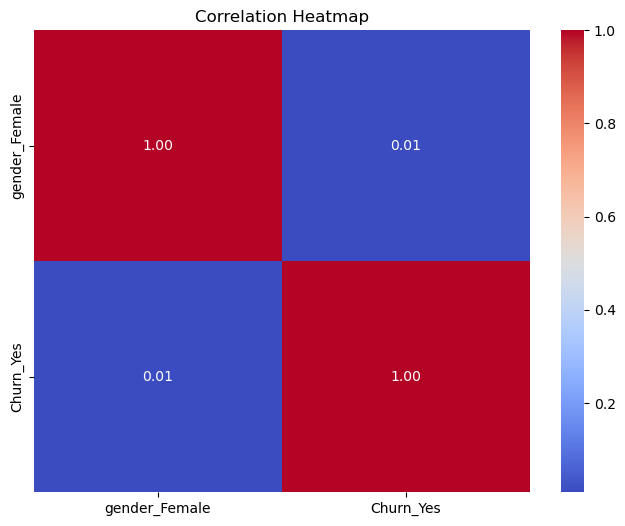

In [135]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Female', 'Churn_Yes', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [137]:
# Calculate the correlation between 'gender_male' and 'Churn_yes'
correlation_coefficient = df_encoded['gender_Male'].corr(df_encoded['Churn_Yes'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.008612095078997892


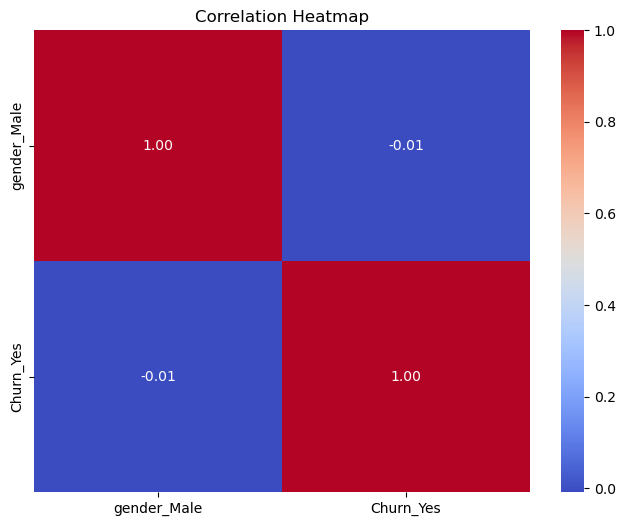

In [139]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Male', 'Churn_Yes', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from scipy import stats

In [140]:
# Calculate the correlation between 'gender_male' and 'Churn_No'
correlation_coefficient = df_encoded['gender_Male'].corr(df_encoded['Churn_No'])

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.008612095078997892


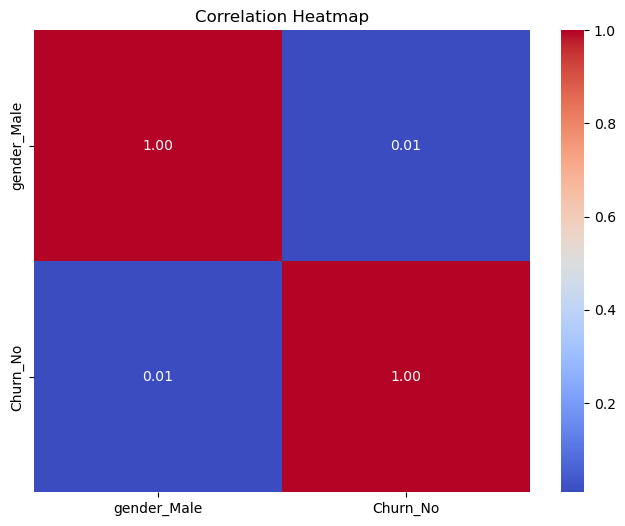

In [141]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[[ 'gender_Male', 'Churn_No', ]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [62]:
#Differentiate between churned and non-churned customers
churned = df[df['Churn'] == 'Yes']
non_churned = df[df['Churn'] == 'No']


In [65]:
# Perform a t-test for monthly charges
t_statistic, p_value = stats.ttest_ind(churned['MonthlyCharges'], non_churned['MonthlyCharges'])
alpha = 0.05

In [66]:
# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 16.536738015936308
P-value: 2.7066456068884154e-60


In [67]:
if p_value < alpha:
    print("Reject the null hypothesis. The means are significantly different.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Reject the null hypothesis. The means are significantly different.


In [69]:
# Perform a t-test for Total charges
t_statistic, p_value = stats.ttest_ind(churned['tenure'], non_churned['tenure'])
alpha = 0.05

In [70]:
# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: -31.57955051135377
P-value: 7.99905796059022e-205


In [71]:
if p_value < alpha:
    print("Reject the null hypothesis. The means are significantly different.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Reject the null hypothesis. The means are significantly different.


In [72]:
# Group by contract type and calculate mean monthly charges
contract_type_summary = df.groupby('Contract')['MonthlyCharges'].mean().reset_index()

In [73]:
# Print the summary table
print(contract_type_summary)

         Contract  MonthlyCharges
0  Month-to-month       66.398490
1        One year       65.048608
2        Two year       60.770413


In [76]:
# Group by  type and calculate mean monthly charges
payment_method_summary = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()

In [77]:
# Print the summary table
print(payment_method_summary)

               PaymentMethod  MonthlyCharges
0  Bank transfer (automatic)       67.192649
1    Credit card (automatic)       66.512385
2           Electronic check       76.255814
3               Mailed check       43.917060


In [79]:
# Group by  type and calculate mean monthly charges
internet_service_summary = df.groupby('InternetService')['MonthlyCharges'].mean().reset_index()

In [80]:
# Print the summary table
print(internet_service_summary)

  InternetService  MonthlyCharges
0             DSL       58.102169
1     Fiber optic       91.500129
2              No       21.079194


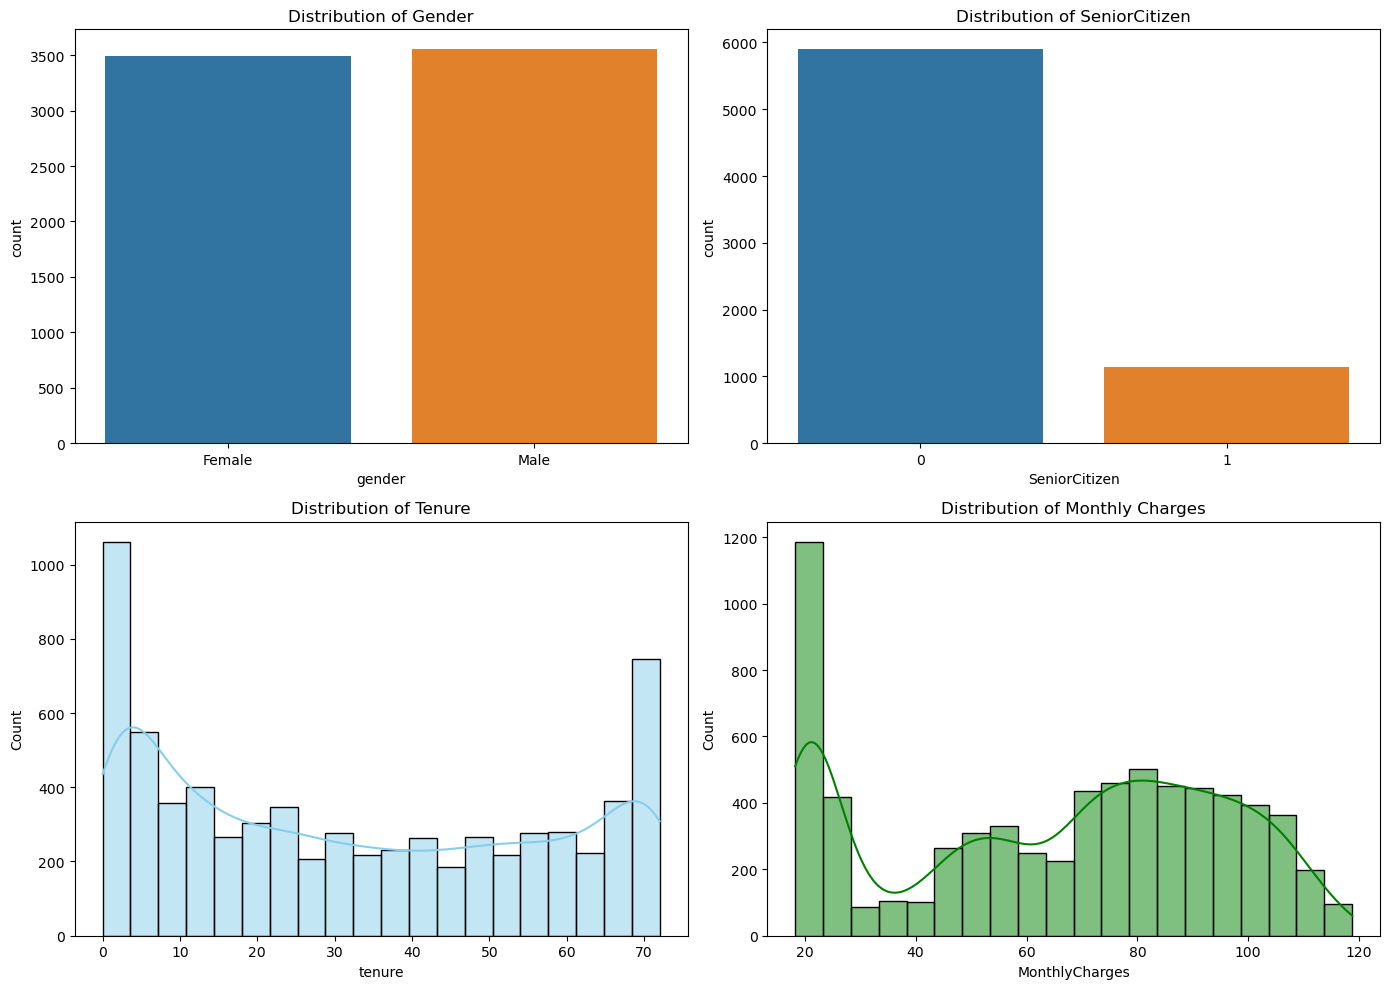

In [115]:
#Create Subplots (Bar plot and Histogram) to show distribution of categorical and numeric variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Bar plot for 'gender' distribution
sns.countplot(data=df, x='gender', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Gender')

# Bar plot for 'SeniorCitizen' distribution
sns.countplot(data=df, x='SeniorCitizen', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of SeniorCitizen')

# Histogram for 'tenure' distribution
sns.histplot(data=df, x='tenure', bins=20, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Distribution of Tenure')

# Histogram for 'MonthlyCharges' distribution
sns.histplot(data=df, x='MonthlyCharges', bins=20, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribution of Monthly Charges')

#set space between subplots
fig.tight_layout()
plt.show()

In [117]:
# Identify numerical variables
numerical_variables = df.select_dtypes(include=['int64', 'float64'])

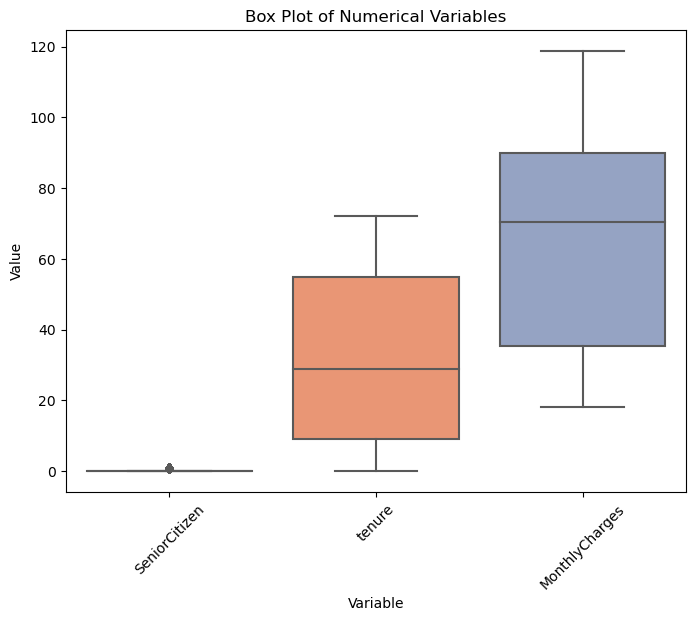

In [120]:
# Create a box plot for numerical variables to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=numerical_variables, orient='v', palette='Set2')
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [121]:
# Calculate the IQR
Q1 = numerical_variables.quantile(0.25)
Q3 = numerical_variables.quantile(0.75)
IQR = Q3 - Q1

In [122]:
# Identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [128]:
print(outliers)

      SeniorCitizen  tenure  MonthlyCharges
0             False   False           False
1             False   False           False
2             False   False           False
3             False   False           False
4             False   False           False
...             ...     ...             ...
7038          False   False           False
7039          False   False           False
7040          False   False           False
7041           True   False           False
7042          False   False           False

[7043 rows x 3 columns]


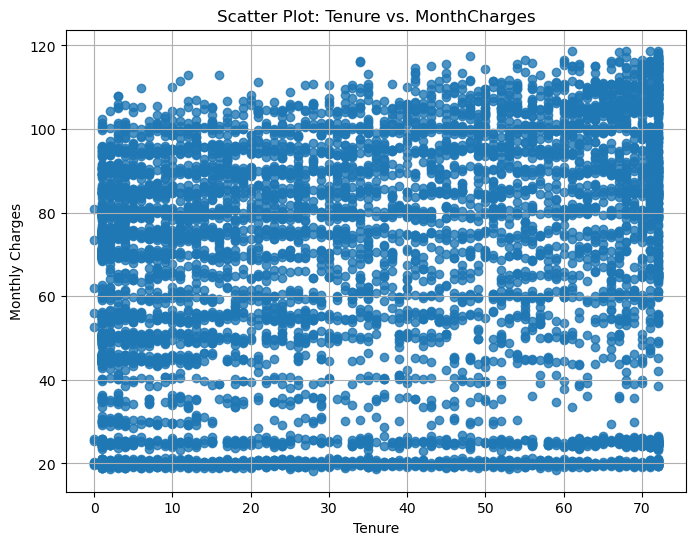

In [130]:
# Scatter plot to explore relationships between numeric variables (Tenure and Monthly Charges)
plt.figure(figsize=(8, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], alpha=0.8)
plt.title('Scatter Plot: Tenure vs. MonthCharges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.grid(True)

plt.show()

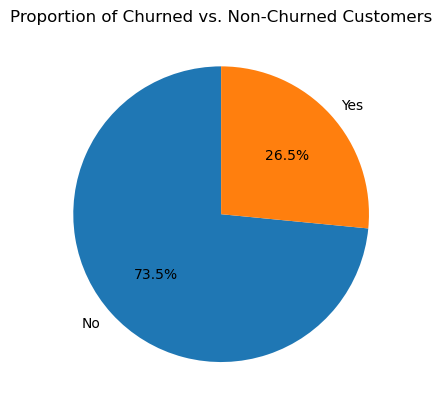

In [131]:
#Pie charts to visualize the proportion of churned vs. non-churned customers
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.show()

In [ ]:
#Summary of My Findings
'There is more correlation between number of churned customers and the gender female. Male customers are more into the category of churned customers. In addition, there is more percentage of churned customers than the non-churned ones' 